# **Inspo 💡**

1. https://www.kaggle.com/code/prashant111/eda-logistic-regression-pca#Logistic-Regression-with-PCA
2. https://cdeiuk.github.io/bias-mitigation/finance/


# **Dataset Info 📁**

link: https://archive.ics.uci.edu/dataset/2/adult

# **Notebook info ℹ️**

|  |  |
| ----------- | ----------- |
| Creator | Axel Xaverius Tamtama |
| GitHub | https://github.com/axelxav |

for fulfilling Tranformasi Digital 2024 - final task



# **Import Library 📚**

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# **Import Dataset 📂**

In [2]:
output_file = 'dataset.csv'

df_text = pd.read_csv('./dataset/adult.data', delimiter=', ', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])
df_text.to_csv(output_file, index=False)

/tmp/ipykernel_5777/1948309233.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_text = pd.read_csv('./dataset/adult.data', delimiter=', ', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])


In [3]:
df = pd.read_csv('dataset.csv')
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## About Dataset

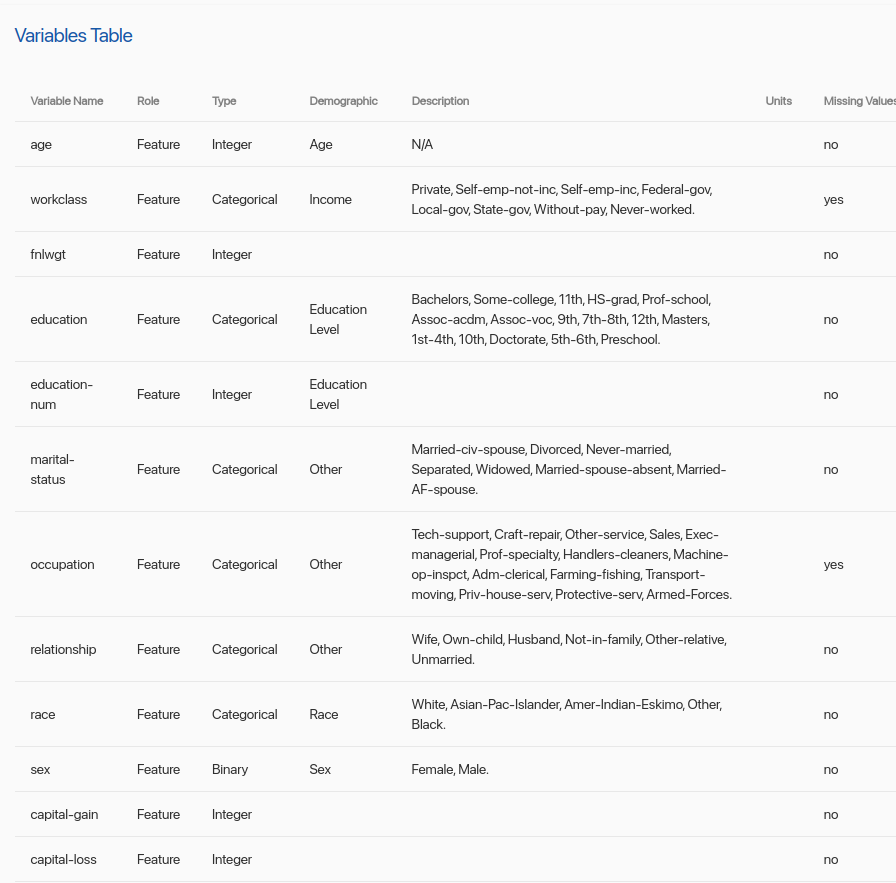
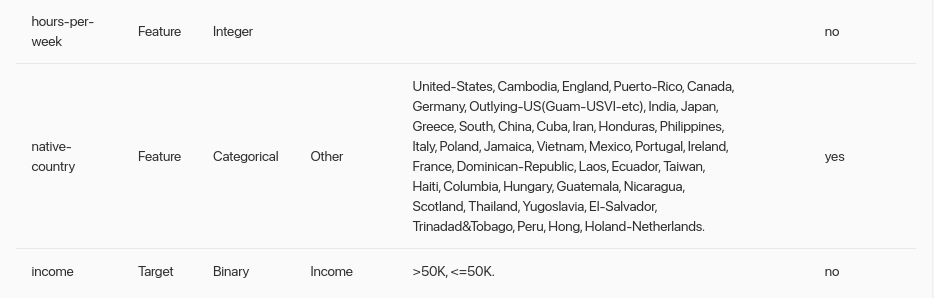

# **EDA 🚀**

## Profiling

In [4]:
df_profile = ProfileReport(df, title='Adult Income Dataset Profiling Report', explorative=True)

In [5]:
df_profile.to_file('adult_income_dataset_profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_profile.to_notebook_iframe()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## **Insight from Profiling Imported Dataset ✏️**

>Terdapat 15 kolom yang terdiri dari 14 _feature_ dan 1 _target_ <br>
<br>Jumlah _categorical feature_ = 8
<br>Jumlah _numerical feature_ = 6
<br>Data yang digunakan sebagai training dataset terdiri dari 32561 row(s) dan tidak memiliki data yang hilang (_missing values_).<br>
<br>Dari hasil profiling, dapat ditarik beberapa _insight_ yang penting dalam membangun algoritma AI, yaitu:
<br>1. Terdapat ketidakseimbangan nilai pada _feature_ 'race', di mana nilai white (ras kulit putih) lebih tinggi nilainya daripada ras lainnya
<br>2. Terdapat ketidakseimbangan lainnya pada _feature_ 'native_country', dapat dilihat bahwa data bernilai 'United-States' lebih banyak kemunculannya daripada nilai yang lainnya.<br>
<br>Dapat dilihat, terdapat _features_ yang membahas terkait data yang sensitif, yaitu:
<br>1. umur -> 'age'
<br>2. ras -> 'race'
<br>3. jenis kelamin -> 'sex'
<br>4. kebangsaan -> 'native_country'<br>
<br>data-data tersebut merupakan kategori data demografi, yang terkadang bisa menjadi sumber bias yang mengarah ke diskriminasi pada proses _decision making_<br>
<br>Pada pengembangan algoritma AI/model machine learning ini, akan dicoba untuk membangun algoritma/model yang dapat menghasilkan prediksi atua pengambilan keputusan yang tidak bias terhadap data sensitif, seperti data demografi dari seseorang.
Dataset yang digunakan dapat merepresentasikan data yang diambil pada dunia nyata, di mana data yang didapatkan tidak selalu dapat merepresentasikan keseluruhan kelompok yang ada, tetapi dalam membangun algoritma tetap harus memberikan hasil yang tidak bias. 

## Exploration

In [9]:
df[(df['race'] != 'White') & (df['income'] == '<=50K')]

age workclass  fnlwgt   education  education_num  \
3       53   Private  234721        11th              7   
4       28   Private  338409   Bachelors             13   
6       49   Private  160187         9th              5   
13      32   Private  205019  Assoc-acdm             12   
15      34   Private  245487     7th-8th              4   
...    ...       ...     ...         ...            ...   
32537   30   Private  345898     HS-grad              9   
32541   41         ?  202822     HS-grad              9   
32544   31   Private  199655     Masters             14   
32551   32   Private   34066        10th              6   
32553   32   Private  116138     Masters             14   

              marital_status         occupation   relationship  \
3         Married-civ-spouse  Handlers-cleaners        Husband   
4         Married-civ-spouse     Prof-specialty           Wife   
6      Married-spouse-absent      Other-service  Not-in-family   
13             Never-married              Sales  Not-in-family   
15        Married-civ-spouse   Transport-moving        Husband   
...                      ...                ...            ...   
32537          Never-married       Craft-repair  Not-in-family   
32541              Separated                  ?  Not-in-family   
32544               Divorced      Other-service  Not-in-family   
32551     Married-civ-spouse  Handlers-cleaners        Husband   
32553          Never-married       Tech-support  Not-in-family   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
6                   Black  Female             0             0              16   
13                  Black    Male             0             0              50   
15     Amer-Indian-Eskimo    Male             0             0              45   
...                   ...     ...           ...           ...             ...   
32537               Black    Male             0             0              46   
32541               Black  Female             0             0              32   
32544               Other  Female             0             0              30   
32551  Amer-Indian-Eskimo    Male             0             0              40   
32553  Asian-Pac-Islander    Male             0             0              11   

      native_country income  
3      United-States  <=50K  
4               Cuba  <=50K  
6            Jamaica  <=50K  
13     United-States  <=50K  
15            Mexico  <=50K  
...              ...    ...  
32537  United-States  <=50K  
32541  United-States  <=50K  
32544  United-States  <=50K  
32551  United-States  <=50K  
32553         Taiwan  <=50K  

[4021 rows x 15 columns]

In [10]:
df[(df['race'] == 'White') & (df['income'] == '<=50K')]

age         workclass  fnlwgt     education  education_num  \
0       39         State-gov   77516     Bachelors             13   
1       50  Self-emp-not-inc   83311     Bachelors             13   
2       38           Private  215646       HS-grad              9   
5       37           Private  284582       Masters             14   
12      23           Private  122272     Bachelors             13   
...    ...               ...     ...           ...            ...   
32552   43           Private   84661     Assoc-voc             11   
32555   22           Private  310152  Some-college             10   
32556   27           Private  257302    Assoc-acdm             12   
32558   58           Private  151910       HS-grad              9   
32559   22           Private  201490       HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
5      Married-civ-spouse    Exec-managerial           Wife  White  Female   
12          Never-married       Adm-clerical      Own-child  White  Female   
...                   ...                ...            ...    ...     ...   
32552  Married-civ-spouse              Sales        Husband  White    Male   
32555       Never-married    Protective-serv  Not-in-family  White    Male   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
5                 0             0              40  United-States  <=50K  
12                0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
32552             0             0              45  United-States  <=50K  
32555             0             0              40  United-States  <=50K  
32556             0             0              38  United-States  <=50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  

[20699 rows x 15 columns]

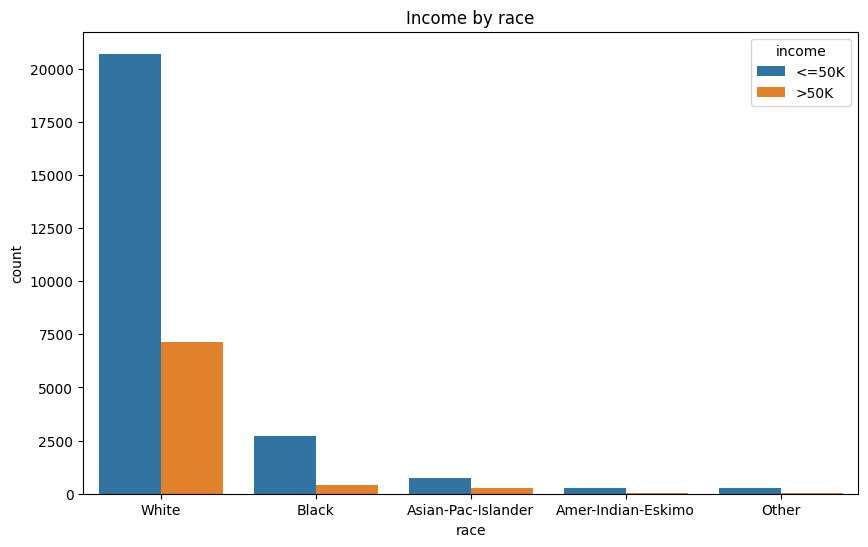

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income')
plt.title('Income by race')
plt.xlabel('race')
plt.ylabel('count')
plt.show()

In [12]:
df[(df['native_country'] != 'United-States') & (df['income'] == '<=50K')]

age         workclass  fnlwgt  education  education_num  \
4       28           Private  338409  Bachelors             13   
6       49           Private  160187        9th              5   
15      34           Private  245487    7th-8th              4   
35      48           Private  242406       11th              7   
51      18           Private  226956    HS-grad              9   
...    ...               ...     ...        ...            ...   
32492   42  Self-emp-not-inc  217597    HS-grad              9   
32508   45           Private  155093       10th              6   
32525   81                 ?  120478  Assoc-voc             11   
32547   43           Private  260761    HS-grad              9   
32553   32           Private  116138    Masters             14   

              marital_status         occupation   relationship  \
4         Married-civ-spouse     Prof-specialty           Wife   
6      Married-spouse-absent      Other-service  Not-in-family   
15        Married-civ-spouse   Transport-moving        Husband   
35             Never-married  Machine-op-inspct      Unmarried   
51             Never-married      Other-service      Own-child   
...                      ...                ...            ...   
32492               Divorced              Sales      Own-child   
32508               Divorced      Other-service  Not-in-family   
32525               Divorced                  ?      Unmarried   
32547     Married-civ-spouse  Machine-op-inspct        Husband   
32553          Never-married       Tech-support  Not-in-family   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
4                   Black  Female             0             0              40   
6                   Black  Female             0             0              16   
15     Amer-Indian-Eskimo    Male             0             0              45   
35                  White    Male             0             0              40   
51                  White  Female             0             0              30   
...                   ...     ...           ...           ...             ...   
32492               White    Male             0             0              50   
32508               Black  Female             0             0              38   
32525               White  Female             0             0               1   
32547               White    Male             0             0              40   
32553  Asian-Pac-Islander    Male             0             0              11   

           native_country income  
4                    Cuba  <=50K  
6                 Jamaica  <=50K  
15                 Mexico  <=50K  
35            Puerto-Rico  <=50K  
51                      ?  <=50K  
...                   ...    ...  
32492                   ?  <=50K  
32508  Dominican-Republic  <=50K  
32525                   ?  <=50K  
32547              Mexico  <=50K  
32553              Taiwan  <=50K  

[2721 rows x 15 columns]

In [13]:
df[(df['native_country'] == 'United-States') & (df['income'] == '<=50K')]

age         workclass  fnlwgt     education  education_num  \
0       39         State-gov   77516     Bachelors             13   
1       50  Self-emp-not-inc   83311     Bachelors             13   
2       38           Private  215646       HS-grad              9   
3       53           Private  234721          11th              7   
5       37           Private  284582       Masters             14   
...    ...               ...     ...           ...            ...   
32552   43           Private   84661     Assoc-voc             11   
32555   22           Private  310152  Some-college             10   
32556   27           Private  257302    Assoc-acdm             12   
32558   58           Private  151910       HS-grad              9   
32559   22           Private  201490       HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
5      Married-civ-spouse    Exec-managerial           Wife  White  Female   
...                   ...                ...            ...    ...     ...   
32552  Married-civ-spouse              Sales        Husband  White    Male   
32555       Never-married    Protective-serv  Not-in-family  White    Male   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
5                 0             0              40  United-States  <=50K  
...             ...           ...             ...            ...    ...  
32552             0             0              45  United-States  <=50K  
32555             0             0              40  United-States  <=50K  
32556             0             0              38  United-States  <=50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  

[21999 rows x 15 columns]

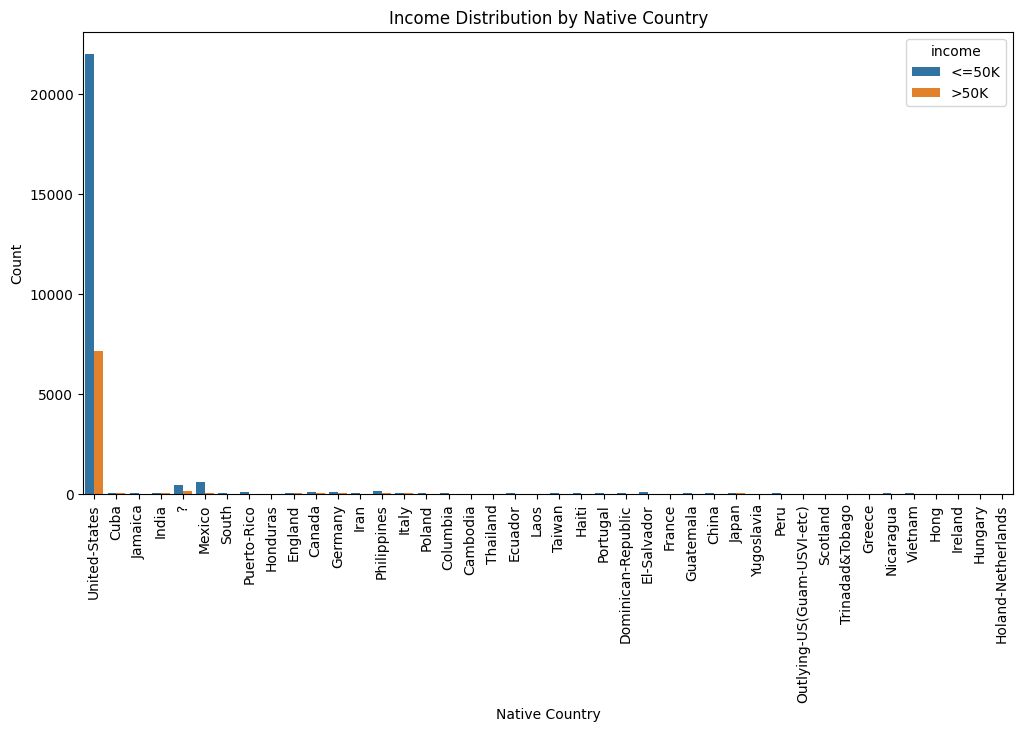

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native_country', hue='income')
plt.xticks(rotation=90)
plt.title('Income Distribution by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()

# **Feature Engineering ⚙️**

## education_num and education

Dari hasil profiling, diketahui bahwa 'education_num' berkolerasi tinggi dengan 'education' dan juga sebaliknya. Selain itu, jika dilihat dari heatmap korelasi yang ada, tertampil bahwa korelasi berada pada angka yang sempurna, yaitu berkolerasi secara menyeluruh.

Perlu diperiksa apakah di antara dua kolom tersebut, ada yang dapat dilakukan drop column atau tidak. <br>
Hal ini diperlukan supaya tidak terjadi bias pada algoritma AI karena dimensi yang besar karena terdapat kolom yang tidak perlu digunakan pada pengembangan algoritma.

In [15]:
df['education_num'].value_counts(ascending=True)

education_num
1        51
2       168
3       333
16      413
8       433
5       514
15      576
4       646
6       933
12     1067
7      1175
11     1382
14     1723
13     5355
10     7291
9     10501
Name: count, dtype: int64

In [16]:
df['education'].value_counts(ascending=True)

education
Preschool          51
1st-4th           168
5th-6th           333
Doctorate         413
12th              433
9th               514
Prof-school       576
7th-8th           646
10th              933
Assoc-acdm       1067
11th             1175
Assoc-voc        1382
Masters          1723
Bachelors        5355
Some-college     7291
HS-grad         10501
Name: count, dtype: int64

Terlihat bahwa 'education_num' adalah representasi dari urutan tingkatan pada 'education'. Hal tersebut menandakan bahwa keduanya, sebetulnya, merupakan data yang sama persis, hanya saja _feature_ 'education_num' adalah bentuk representasi angka dari _feature_ 'education' dan sudah diurutkan dari tingkatan edukasi yang ada. Oleh karena itu, pada pengembangan algoritma AI kali ini, dapat digunakan salah satu saja dari kedua _feature_ tersebut. <br>
Untuk itu, bisa diambil salah satu saja, bebas, dan di akan dibuang _feature_ 'education' sehingga menyisakan 'education_num' saja.

In [17]:
df.drop('education', axis=1, inplace=True)
df['education_num'] = df['education_num'] - 1

In [18]:
df.head()

age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             12       Never-married   
1   50  Self-emp-not-inc   83311             12  Married-civ-spouse   
2   38           Private  215646              8            Divorced   
3   53           Private  234721              6  Married-civ-spouse   
4   28           Private  338409             12  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [19]:
df['education_num'].value_counts().sort_index()

education_num
0        51
1       168
2       333
3       646
4       514
5       933
6      1175
7       433
8     10501
9      7291
10     1382
11     1067
12     5355
13     1723
14      576
15      413
Name: count, dtype: int64

## relationship and sex

Pada hasil dari profiling, tertampil juga bahwa korelasi antara 'relationship' dengan 'sex' sangat tinggi

In [20]:
df['relationship'].value_counts(ascending=True)

relationship
Other-relative      981
Wife               1568
Unmarried          3446
Own-child          5068
Not-in-family      8305
Husband           13193
Name: count, dtype: int64

In [21]:
df['sex'].value_counts(ascending=True)

sex
Female    10771
Male      21790
Name: count, dtype: int64

Tidak ada yang salah dari kedua _feature_ tersebut sehingga keduanya aman untuk digunakan

## categorical features containing "?"

Terdapat beberapa kolom yang memiliki nilai berupa string "?". <br>
Hal tersebut dapat mengganggu jalannya proses training algoritma AI, jika nilai yang tidak representatif tersebut berada pada kolom _target_. Oleh karena itu, perlu diadakan pengecekan supaya dataset aman untuk digunakan sebelum dijadikan bahan training.

In [22]:
# print which columns have "?" values

for col in df.columns:
	if df[col].dtype == 'object':
		print(col, (df[col] == '?').sum())
  

workclass 1836
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
native_country 583
income 0


Setelah dilakukan pengecekan, ternyata nilai "?" tidak terdapat pada kolom 'target'. Akan tetapi, tetap saja, nilai tersebut nampaknya muncul dengan jumlah yang banyak pada _feature_ 'workclass', 'occupation', dan 'native_country'. <br>
Diperlukan adanya pemrosesan pada hal tersebut untuk menjaga supaya algoritma AI yang akan dibuat tidak terjadi bias.

In [23]:
# replace "?" with NaN

df.replace('?', np.nan, inplace=True)

In [24]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Sekarang terllihat bahwa ketiga _feature_ tadi memiliki nilai NaN atau biasa disebut dengan null. <br>
Ketiga kolom tersebut merupakan _categorical feature_ sehingga akan lebih baik untuk tetap digunakan/tidak dibuang baris yang memiliki nilai NaN, tetapi dilakukan imputasi saja dengan cara yang paling umum, yaitu imputasi dengan nilai yang paling sering muncul pada masing-masing _feature_.

### Imputation for NaN Values for workclass, occupation, and native_country

In [25]:
for col in ['workclass', 'occupation', 'native_country']:
	df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_5777/3504607341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Nilai-nilai null yang tadi ada pada ketiga kolom tersebut sekarang sudah terisi dan dapat digunakan untuk pengembangan algortima AI yang nantinya akan dibuat.

Dari hasil profiling, dapat dilihat pada _feature_ 'capital_gain' dan 'capital_loss', keduanya memiliki nilai zero atau nol yang sangat mendominasi. Akan dilakukan pengecekan terhadap nilai yang ada pada kedua _feature_ tersebut.

In [27]:
df['capital_gain'].value_counts(ascending=False)

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [28]:
df[df['capital_gain'] == 0]

age         workclass  fnlwgt  education_num      marital_status  \
1       50  Self-emp-not-inc   83311             12  Married-civ-spouse   
2       38           Private  215646              8            Divorced   
3       53           Private  234721              6  Married-civ-spouse   
4       28           Private  338409             12  Married-civ-spouse   
5       37           Private  284582             13  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
32555   22           Private  310152              9       Never-married   
32556   27           Private  257302             11  Married-civ-spouse   
32557   40           Private  154374              8  Married-civ-spouse   
32558   58           Private  151910              8             Widowed   
32559   22           Private  201490              8       Never-married   

              occupation   relationship   race     sex  capital_gain  \
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
5        Exec-managerial           Wife  White  Female             0   
...                  ...            ...    ...     ...           ...   
32555    Protective-serv  Not-in-family  White    Male             0   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   

       capital_loss  hours_per_week native_country income  
1                 0              13  United-States  <=50K  
2                 0              40  United-States  <=50K  
3                 0              40  United-States  <=50K  
4                 0              40           Cuba  <=50K  
5                 0              40  United-States  <=50K  
...             ...             ...            ...    ...  
32555             0              40  United-States  <=50K  
32556             0              38  United-States  <=50K  
32557             0              40  United-States   >50K  
32558             0              40  United-States  <=50K  
32559             0              20  United-States  <=50K  

[29849 rows x 14 columns]

In [29]:
df[(df['capital_gain'] == 0) & (df['capital_loss'] != 0)]

age         workclass  fnlwgt  education_num      marital_status  \
23      43           Private  117037              6  Married-civ-spouse   
32      45           Private  386940             12            Divorced   
52      47           Private   51835             14  Married-civ-spouse   
93      30           Private  117747              8  Married-civ-spouse   
96      48  Self-emp-not-inc  191277             15  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
32441   53           Private  304504              9  Married-civ-spouse   
32443   18           Private   41381              8       Never-married   
32445   61           Private  190682              8             Widowed   
32458   36           Private  237943             12  Married-civ-spouse   
32500   34           Private   60567              6            Divorced   

             occupation   relationship                race     sex  \
23     Transport-moving        Husband               White    Male   
32      Exec-managerial      Own-child               White    Male   
52       Prof-specialty           Wife               White  Female   
93                Sales           Wife  Asian-Pac-Islander  Female   
96       Prof-specialty        Husband               White    Male   
...                 ...            ...                 ...     ...   
32441  Transport-moving        Husband               White    Male   
32443             Sales      Own-child               White  Female   
32445      Craft-repair  Not-in-family               Black  Female   
32458    Prof-specialty        Husband               White    Male   
32500  Transport-moving      Unmarried               White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
23                0          2042              40  United-States  <=50K  
32                0          1408              40  United-States  <=50K  
52                0          1902              60       Honduras   >50K  
93                0          1573              35  United-States  <=50K  
96                0          1902              60  United-States   >50K  
...             ...           ...             ...            ...    ...  
32441             0          1887              45  United-States   >50K  
32443             0          1602              20  United-States  <=50K  
32445             0          1669              50  United-States  <=50K  
32458             0          1977              45  United-States   >50K  
32500             0           880              60  United-States  <=50K  

[1519 rows x 14 columns]

In [30]:
df['capital_loss'].value_counts(ascending=False)

capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [31]:
df[df['capital_loss'] == 0]

age         workclass  fnlwgt  education_num      marital_status  \
0       39         State-gov   77516             12       Never-married   
1       50  Self-emp-not-inc   83311             12  Married-civ-spouse   
2       38           Private  215646              8            Divorced   
3       53           Private  234721              6  Married-civ-spouse   
4       28           Private  338409             12  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
32556   27           Private  257302             11  Married-civ-spouse   
32557   40           Private  154374              8  Married-civ-spouse   
32558   58           Private  151910              8             Widowed   
32559   22           Private  201490              8       Never-married   
32560   52      Self-emp-inc  287927              8  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital_loss  hours_per_week native_country income  
0                 0              40  United-States  <=50K  
1                 0              13  United-States  <=50K  
2                 0              40  United-States  <=50K  
3                 0              40  United-States  <=50K  
4                 0              40           Cuba  <=50K  
...             ...             ...            ...    ...  
32556             0              38  United-States  <=50K  
32557             0              40  United-States   >50K  
32558             0              40  United-States  <=50K  
32559             0              20  United-States  <=50K  
32560             0              40  United-States   >50K  

[31042 rows x 14 columns]

In [32]:
df[(df['capital_loss'] == 0) & (df['capital_gain'] != 0) ]

age         workclass  fnlwgt  education_num      marital_status  \
0       39         State-gov   77516             12       Never-married   
8       31           Private   45781             13       Never-married   
9       42           Private  159449             12  Married-civ-spouse   
59      30           Private  188146              8  Married-civ-spouse   
60      30           Private   59496             12  Married-civ-spouse   
...    ...               ...     ...            ...                 ...   
32515   66       Federal-gov   47358              5  Married-civ-spouse   
32518   57         Local-gov  110417              8  Married-civ-spouse   
32538   38           Private  139180             12            Divorced   
32548   65  Self-emp-not-inc   99359             14       Never-married   
32560   52      Self-emp-inc  287927              8  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
8         Prof-specialty  Not-in-family  White  Female         14084   
9        Exec-managerial        Husband  White    Male          5178   
59     Machine-op-inspct        Husband  White    Male          5013   
60                 Sales        Husband  White    Male          2407   
...                  ...            ...    ...     ...           ...   
32515       Craft-repair        Husband  White    Male          3471   
32518       Craft-repair        Husband  White    Male         99999   
32538     Prof-specialty      Unmarried  Black  Female         15020   
32548     Prof-specialty  Not-in-family  White    Male          1086   
32560    Exec-managerial           Wife  White  Female         15024   

       capital_loss  hours_per_week native_country income  
0                 0              40  United-States  <=50K  
8                 0              50  United-States   >50K  
9                 0              40  United-States   >50K  
59                0              40  United-States  <=50K  
60                0              40  United-States  <=50K  
...             ...             ...            ...    ...  
32515             0              40  United-States  <=50K  
32518             0              40  United-States   >50K  
32538             0              45  United-States   >50K  
32548             0              60  United-States  <=50K  
32560             0              40  United-States   >50K  

[2712 rows x 14 columns]

Setelah dilakukan inspeksi pada kedua _feature_ tersebut, dominasi nilai zeros/nol dapat diabaikan

## encoding categorical features

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [34]:
df.head()

age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             12       Never-married   
1   50  Self-emp-not-inc   83311             12  Married-civ-spouse   
2   38           Private  215646              8            Divorced   
3   53           Private  234721              6  Married-civ-spouse   
4   28           Private  338409             12  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

> Karena dalam kalkulasi mesin pembelajaran, input yang bisa diterima adalah berbentuk angka, diperlukan encoding pada beberapa _feature_ supaya dapat diubah menjadi representasi angka. <br>
<br> Oleh karena itu, akan dilakukan encoding menggunakan One Hot Encoding untuk beberapa _feature_: 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', dan 'native_country'.

In [35]:
# convert categorical columns to category data type

for col in df.columns:
	if df[col].dtype == 'object' and col != 'income':
		df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education_num   32561 non-null  int64   
 4   marital_status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital_gain    32561 non-null  int64   
 10  capital_loss    32561 non-null  int64   
 11  hours_per_week  32561 non-null  int64   
 12  native_country  32561 non-null  category
 13  income          32561 non-null  object  
dtypes: category(7), int64(6), object(1)
memory usage: 2.0+ MB


In [36]:
cat_cols = df.select_dtypes(include='category').columns
print(cat_cols)

Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country'],
      dtype='object')


In [37]:
df_encoced = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [38]:
df_encoced.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             12          2174             0              40   
1   50   83311             12             0             0              13   
2   38  215646              8             0             0              40   
3   53  234721              6             0             0              40   
4   28  338409             12             0             0              40   

  income  workclass_Local-gov  workclass_Never-worked  workclass_Private  ...  \
0  <=50K                False                   False              False  ...   
1  <=50K                False                   False              False  ...   
2  <=50K                False                   False               True  ...   
3  <=50K                False                   False               True  ...   
4  <=50K                False                   False               True  ...   

   native_country_Portugal  native_country_Puerto-Rico  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   native_country_Scotland  native_country_South  native_country_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   native_country_Thailand  native_country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   native_country_United-States  native_country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                         False                   False   

   native_country_Yugoslavia  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 83 columns]

In [39]:
df_encoced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        32561 non-null  int64 
 1   fnlwgt                                     32561 non-null  int64 
 2   education_num                              32561 non-null  int64 
 3   capital_gain                               32561 non-null  int64 
 4   capital_loss                               32561 non-null  int64 
 5   hours_per_week                             32561 non-null  int64 
 6   income                                     32561 non-null  object
 7   workclass_Local-gov                        32561 non-null  bool  
 8   workclass_Never-worked                     32561 non-null  bool  
 9   workclass_Private                          32561 non-null  bool  
 10  workclass_Self-emp-inc            

## grouping into features and target variable

In [40]:
X = df_encoced.drop('income', axis=1)
y = df_encoced['income']

In [41]:
X.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             12          2174             0              40   
1   50   83311             12             0             0              13   
2   38  215646              8             0             0              40   
3   53  234721              6             0             0              40   
4   28  338409             12             0             0              40   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  ...  native_country_Portugal  \
0                   False  ...                    False   
1                   False  ...                    False   
2                   False  ...                    False   
3                   False  ...                    False   
4                   False  ...                    False   

   native_country_Puerto-Rico  native_country_Scotland  native_country_South  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   

   native_country_Taiwan  native_country_Thailand  \
0                  False                    False   
1                  False                    False   
2                  False                    False   
3                  False                    False   
4                  False                    False   

   native_country_Trinadad&Tobago  native_country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                         False   

   native_country_Vietnam  native_country_Yugoslavia  
0                   False                      False  
1                   False                      False  
2                   False                      False  
3                   False                      False  
4                   False                      False  

[5 rows x 82 columns]

In [42]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [43]:
y = y.astype('category')
y = y.cat.codes
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: None
Non-Null Count  Dtype
--------------  -----
32561 non-null  int8 
dtypes: int8(1)
memory usage: 31.9 KB


## splitting into train and test dataset

In [44]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## scaling numerical values

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### bring the scaled values back to dataframe

In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [47]:
X_train_scaled.head()

age    fnlwgt  education_num  capital_gain  capital_loss  \
0 -0.408756  0.080051       1.133702     -0.145715     -0.217998   
1 -0.188857 -0.981653       0.357049     -0.145715      4.457168   
2  1.423734  0.126197      -1.972910     -0.145715     -0.217998   
3 -1.288351 -0.090935       0.357049     -0.145715     -0.217998   
4 -0.848554  0.856334      -0.031277     -0.145715     -0.217998   

   hours_per_week  workclass_Local-gov  workclass_Never-worked  \
0        0.779460             3.777362               -0.016395   
1        0.779460            -0.264735               -0.016395   
2       -0.031510            -0.264735               -0.016395   
3        0.455072            -0.264735               -0.016395   
4       -0.031510            -0.264735               -0.016395   

   workclass_Private  workclass_Self-emp-inc  ...  native_country_Portugal  \
0          -1.737208               -0.189613  ...                -0.034519   
1           0.575636               -0.189613  ...                -0.034519   
2          -1.737208               -0.189613  ...                -0.034519   
3           0.575636               -0.189613  ...                -0.034519   
4           0.575636               -0.189613  ...                -0.034519   

   native_country_Puerto-Rico  native_country_Scotland  native_country_South  \
0                   -0.059535                -0.018591             -0.050782   
1                   -0.059535                -0.018591             -0.050782   
2                   -0.059535                -0.018591             -0.050782   
3                   -0.059535                -0.018591             -0.050782   
4                   -0.059535                -0.018591             -0.050782   

   native_country_Taiwan  native_country_Thailand  \
0              -0.039217                -0.022346   
1              -0.039217                -0.022346   
2              -0.039217                -0.022346   
3              -0.039217                -0.022346   
4              -0.039217                -0.022346   

   native_country_Trinadad&Tobago  native_country_United-States  \
0                       -0.024792                      0.310465   
1                       -0.024792                      0.310465   
2                       -0.024792                      0.310465   
3                       -0.024792                      0.310465   
4                       -0.024792                      0.310465   

   native_country_Vietnam  native_country_Yugoslavia  
0               -0.048846                   -0.02319  
1               -0.048846                   -0.02319  
2               -0.048846                   -0.02319  
3               -0.048846                   -0.02319  
4               -0.048846                   -0.02319  

[5 rows x 82 columns]

# **Modeling 🤖**

>Pada proses penentuan penggunaan algoritma mana yang nantinya akan digunakan, akan dicoba beberapa algoritma terlebih dahulu dengan pendekatan yang berbeda pula.

## Import Library for Modeling

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

## Logistic Regression

In [49]:
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)
y_test_pred = logreg.predict(X_test_scaled)

# calculate the classification report

class_report = classification_report(y_test, y_test_pred)
print('Classification Report:\n', class_report)

# calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix:
 [[4603  339]
 [ 611  960]]


Dapat dilihat dari hasil yang didapatkan menggunakan algoritma Logistic Regression, didapatkan hasil yang tertampil pada classification report.

Jika menggunakan f1 - score sebagai acuan dari evaluasi algoritma AI yang dikembangkan, hasil menyatakan bahwa tingkat keakuratan dari algoritma adalah 85%

In [50]:
y_train_pred = logreg.predict(X_train_scaled)

class_report_train = classification_report(y_train, y_train_pred)
print('Classification Report (Train):\n', class_report_train)

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     19778
           1       0.74      0.60      0.66      6270

    accuracy                           0.85     26048
   macro avg       0.81      0.77      0.78     26048
weighted avg       0.85      0.85      0.85     26048



Jika dilihat, akurasi yang tertampil (f1-score) sama dengan akurasi pada data test. Hal tersebut menandakan bahwa algoritma AI yang dikembangkan tidak mengalami overfitting, kondisi di mana algoritma/model terlalu mengingat nilai yang ada pada dataset. <br>
Hal ini harus diteliti karena sudah diketahui sebelumnya bahwa terjadi imbalance data pada beberapa _feature_ yang ada pada dataset.

## Logistic Regression with Stratified K-Fold

In [51]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
	
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	logreg.fit(X_train_scaled, y_train)
	y_test_pred = logreg.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)
	
	

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4944
           1       0.73      0.60      0.66      1569

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513

Confusion Matrix:
 [[4601  343]
 [ 631  938]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4944
           1       0.74      0.60      0.66      1568

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.78      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
 [[4620  324]
 [ 633  935]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4944
           1       0.72      0.58      0.65      1568

    accuracy      

## Logistic Regression with SMOTE

In [64]:
smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

logreg.fit(X_train_scaled, y_train_resampled)
y_test_pred = logreg.predict(X_test_scaled)

class_report = classification_report(y_test, y_test_pred)
print('Classification Report:\n', class_report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4942
           1       0.66      0.68      0.67      1571

    accuracy                           0.84      6513
   macro avg       0.78      0.78      0.78      6513
weighted avg       0.84      0.84      0.84      6513

Confusion Matrix:
 [[4391  551]
 [ 509 1062]]


Dapat dilihat bahwa hasil dari LogReg menggunakan SMOTE menghasilkan TP dan TN yang lebih baik dari LogReg menggunakan Stratified K Fold tanpa SMOTE. <br>
Akan dicoba untuk menerapkan SMOTE dan Stratified K Fold

## Logistic Regression with SMOTE and Stratified K Fold

In [65]:
for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	logreg.fit(X_train_scaled, y_train_resampled)
	y_test_pred = logreg.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)
	
	

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4944
           1       0.66      0.66      0.66      1569

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513

Confusion Matrix:
 [[4414  530]
 [ 541 1028]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4944
           1       0.66      0.67      0.67      1568

    accuracy                           0.84      6512
   macro avg       0.78      0.78      0.78      6512
weighted avg       0.84      0.84      0.84      6512

Confusion Matrix:
 [[4411  533]
 [ 520 1048]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4944
           1       0.66      0.67      0.66      1568

    accuracy      

## Random Forest Classifier with SMOTE and Stratified K Fold

In [67]:
rf = RandomForestClassifier(random_state=42)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	rf.fit(X_train_scaled, y_train_resampled)
	y_test_pred = rf.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)
	
	

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4944
           1       0.70      0.67      0.68      1569

    accuracy                           0.85      6513
   macro avg       0.80      0.79      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix:
 [[4484  460]
 [ 515 1054]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4944
           1       0.70      0.68      0.69      1568

    accuracy                           0.85      6512
   macro avg       0.80      0.79      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
 [[4479  465]
 [ 508 1060]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4944
           1       0.69      0.67      0.68      1568

    accuracy      

## CatBoost with SMOTE and Stratified K Fold

In [74]:
# catboost classifier

catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', eval_metric='AUC', verbose=0, random_seed=42)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	catboost.fit(X_train_scaled, y_train_resampled, eval_set=(X_test_scaled, y_test))
	y_test_pred = catboost.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4944
           1       0.73      0.69      0.71      1569

    accuracy                           0.86      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.86      0.86      0.86      6513

Confusion Matrix:
 [[4538  406]
 [ 486 1083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      4944
           1       0.72      0.71      0.72      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.81      0.81      6512
weighted avg       0.86      0.86      0.86      6512

Confusion Matrix:
 [[4516  428]
 [ 456 1112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      4944
           1       0.73      0.70      0.71      1568

    accuracy      

## Simpler CatBoost

In [73]:
# catboost classifier

cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	cat.fit(X_train_scaled, y_train_resampled, eval_set=(X_test_scaled, y_test))
	y_test_pred = cat.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4944
           1       0.70      0.71      0.70      1569

    accuracy                           0.85      6513
   macro avg       0.80      0.80      0.80      6513
weighted avg       0.86      0.85      0.86      6513

Confusion Matrix:
 [[4459  485]
 [ 461 1108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4944
           1       0.69      0.72      0.71      1568

    accuracy                           0.86      6512
   macro avg       0.80      0.81      0.81      6512
weighted avg       0.86      0.86      0.86      6512

Confusion Matrix:
 [[4444  500]
 [ 440 1128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4944
           1       0.68      0.71      0.70      1568

    accuracy      

## SVM with SMOTE and Stratified K Fold

In [71]:
# svm classifier

svm = SVC(kernel='rbf', random_state=42)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	svm.fit(X_train_scaled, y_train_resampled)
	y_test_pred = svm.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4944
           1       0.69      0.62      0.65      1569

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

Confusion Matrix:
 [[4513  431]
 [ 602  967]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4944
           1       0.69      0.62      0.66      1568

    accuracy                           0.84      6512
   macro avg       0.79      0.77      0.78      6512
weighted avg       0.84      0.84      0.84      6512

Confusion Matrix:
 [[4506  438]
 [ 589  979]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4944
           1       0.69      0.61      0.65      1568

    accuracy      

## KNN with SMOTE and Stratified K Fold

In [72]:
# knn classifier

knn = KNeighborsClassifier(n_neighbors=5)

for train_index, test_index in kf.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
	X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
	X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X.columns)
	X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
	
	knn.fit(X_train_scaled, y_train_resampled)
	y_test_pred = knn.predict(X_test_scaled)
	
	class_report = classification_report(y_test, y_test_pred)
	print('Classification Report:\n', class_report)
 
	conf_matrix = confusion_matrix(y_test, y_test_pred)
	print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4944
           1       0.64      0.59      0.62      1569

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513

Confusion Matrix:
 [[4425  519]
 [ 639  930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4944
           1       0.64      0.60      0.62      1568

    accuracy                           0.82      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512

Confusion Matrix:
 [[4402  542]
 [ 620  948]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4944
           1       0.64      0.60      0.62      1568

    accuracy      